In [2]:
import sys
import importlib
import os
# make the module available from the src directory
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
data_dir = "../datasets/artificial_data/3d_shapes"

def create_list():
    pairs = []
    all_files = os.listdir(data_dir)
    for filename in all_files:
        label = int(filename.split("_").pop().replace(".pt", ""))
        label_dict = { "size": label }
        file_path = os.path.join(data_dir, filename)
        pairs.append({"image": file_path, "label": label_dict})
    return pairs

pairs = create_list()
print(pairs)

[{'image': '../datasets/artificial_data/3d_shapes/volume_69_label_26.pt', 'label': {'size': 26}}, {'image': '../datasets/artificial_data/3d_shapes/volume_628_label_12.pt', 'label': {'size': 12}}, {'image': '../datasets/artificial_data/3d_shapes/volume_290_label_15.pt', 'label': {'size': 15}}, {'image': '../datasets/artificial_data/3d_shapes/volume_526_label_10.pt', 'label': {'size': 10}}, {'image': '../datasets/artificial_data/3d_shapes/volume_32_label_27.pt', 'label': {'size': 27}}, {'image': '../datasets/artificial_data/3d_shapes/volume_297_label_26.pt', 'label': {'size': 26}}, {'image': '../datasets/artificial_data/3d_shapes/volume_898_label_23.pt', 'label': {'size': 23}}, {'image': '../datasets/artificial_data/3d_shapes/volume_839_label_11.pt', 'label': {'size': 11}}, {'image': '../datasets/artificial_data/3d_shapes/volume_711_label_13.pt', 'label': {'size': 13}}, {'image': '../datasets/artificial_data/3d_shapes/volume_461_label_26.pt', 'label': {'size': 26}}, {'image': '../dataset

In [4]:
from src.transformers.TensorLoaderTransfomer import TensorLoader
from monai.transforms import Compose, LoadImaged, EnsureChannelFirstD, ScaleIntensityd, ToTensord, ResizeD, Lambdad, NormalizeIntensityD

from src.transformers.SliceTransformer import SliceAggregateTransform
importlib.reload(sys.modules['src.transformers.SliceTransformer'])

importlib.reload(sys.modules['src.transformers.TensorLoaderTransfomer'])
transforms = [
    TensorLoader(keys=["image"]),
    SliceAggregateTransform(keys=["image"], slices_from_each_view=9),
    # ResizeD(keys=["image"], spatial_size=(128, 128, 128)),
    ScaleIntensityd(keys=["image"], minv=0.0, maxv=1.0, factor=1.0),
    NormalizeIntensityD(keys=["image"], nonzero=True, channel_wise=True),
    ToTensord(keys=["image"])
    ]

/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/io/image.py:13: UserWarning: Failed to load image Python extension: 'dlopen(/Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/image.so, 0x0006): Symbol not found: __ZN3c1017RegisterOperatorsD1Ev
  Referenced from: <E03EDA44-89AE-3115-9796-62BA9E0E2EDE> /Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torchvision/image.so
  Expected in:     <D2077E4D-18BC-34B9-8A9B-1EF634A0F416> /Users/askelundsgaard/opt/anaconda3/envs/MLA/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib'If you don't plan on using image functionality from `torchvision.io`, you can ignore this warning. Otherwise, there might be something wrong with your environment. Did you have `libjpeg` or `libpng` installed before building `torchvision` from source?
  warn(


In [6]:
from src.dataLoaders.NiftiDataLoader2 import NiftiDataLoader
importlib.reload(sys.modules['src.dataLoaders.NiftiDataLoader2'])

<module 'src.dataLoaders.NiftiDataLoader2' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/NiftiDataLoader2.py'>

In [7]:
dataset = 'niftiShort'
data_path = '../datasets/nifti/'
data_dir = f'{data_path}{dataset}'

# data_dir = 'C:/Users/askel/Downloads/NIFTY/NIFTY/'
# max = 8876
dim = 384
data_loader = NiftiDataLoader(data_dir=data_dir, 
                              batch_size=32,
                              spatial_resize=(dim, dim, dim),
                              cache_rate=0.5, 
                              replace_rate=1,
                              transforms=transforms,
                              data_list=pairs,
                              )
# data_loader.load_data(visit_no=visit, subset_size=2058, cache="standard")
# data_loader.load_data(subset_size=84, cache="standard")
#data_loader.load_data(subset_size=4400, cache="standard")
# data_loader.load_data(subset_size=8875, cache="standard")

data_loader.load_data(cache="standard")

File /Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/dataLoaders/saved_data_lists/data_list.pkl does not exist.
Data list loaded: False
Using custom sampler: False
Subset size: 1000


Loading dataset: 100%|██████████| 100/100 [00:01<00:00, 90.09it/s]

batch_size: 32


In [204]:
from src.models.medical_models.medical_resnet import MedicalResNetModel
importlib.reload(sys.modules['src.models.medical_models.base_medical'])
importlib.reload(sys.modules['src.models.medical_models.medical_resnet'])


from src.models.medical_models.monai_resnet import MonaiMedicalResNet
importlib.reload(sys.modules['src.models.medical_models.monai_resnet'])

from src.models.medical_models.combined_medical import MedicalCombinedResNetModel
importlib.reload(sys.modules['src.models.medical_models.combined_medical'])

# from src.models.medical_models.combined_medical_old import MedicalCombinedResNetModel
# importlib.reload(sys.modules['src.models.medical_models.combined_medical_old'])

# from src.models.medical_models.adaptive_slicing_medical_resnet import AdaptiveMedicalResNetModel
# importlib.reload(sys.modules['src.models.medical_models.adaptive_slicing_medical_resnet'])

<module 'src.models.medical_models.combined_medical' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/models/medical_models/combined_medical.py'>

In [185]:
# Create a model instance
fast_model = MedicalResNetModel(
    num_epochs=5,
    learning_rate=0.001,
    weight_decay=1e-4,
    data_loader=data_loader,
    # dropout_rate=0.1,
    depth=18
    #pretrained=False
)

# model.load_model('MedicalResNetModel_18_6212_epoch_38.pth')
fast_model.train()
fast_model.evaluate()

Data loader train loader:  25 800
Image spatial dimensions:  torch.Size([32, 9, 256, 256])
Number of input channels:  9
model:  <generator object Module.parameters at 0x1d675b140>
GPU:  mps:0
Number of training images: 800
Outputs:  torch.Size([32, 1])
Outputs:  torch.Size([32, 1])
Outputs:  torch.Size([32, 1])
Outputs:  torch.Size([4, 1])
Epoch 1/5, Train Loss: 165.0435375213623, Val Loss: 38.96462821960449, R^2 Score: -0.06802308559417725, P-value: 1.0
Model saved at /Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/models/medical_models/saved_models/MedicalResNetModel_18_800_height_torch.Size([32, 9, 256, 256])_epoch_1_val_38.96_r2_0.pth
Outputs:  torch.Size([32, 1])
Outputs:  torch.Size([32, 1])
Outputs:  torch.Size([32, 1])
Outputs:  torch.Size([4, 1])
Epoch 2/5, Train Loss: 11.261559476852417, Val Loss: 33.19242715835571, R^2 Score: 0.19296139478683472, P-value: 4.827322652833921e-06
Model saved at /Users/askelundsgaard/Documents/datal

In [205]:
fusion_model = MedicalCombinedResNetModel(
    num_epochs=1,
    learning_rate=0.01,
    weight_decay=1e-4,
    data_loader=data_loader,
    dropout_rate=0.1,
    depth=18
    #pretrained=False
)

# fusion_model.train()
# fusion_model.evaluate()

Data loader train loader:  25 800
Image spatial dimensions:  torch.Size([32, 9, 256, 256])
Number of input channels:  9
model:  <generator object Module.parameters at 0x1c07aa180>
GPU:  mps:0
Number of training images: 800
axial_features.shape torch.Size([32, 512, 1, 1])
axial_features reshape torch.Size([32, 512])
axial_features.shape torch.Size([32, 512, 1, 1])
axial_features reshape torch.Size([32, 512])
axial_features.shape torch.Size([32, 512, 1, 1])
axial_features reshape torch.Size([32, 512])
axial_features.shape torch.Size([32, 512, 1, 1])
axial_features reshape torch.Size([32, 512])
axial_features.shape torch.Size([32, 512, 1, 1])
axial_features reshape torch.Size([32, 512])
axial_features.shape torch.Size([32, 512, 1, 1])
axial_features reshape torch.Size([32, 512])
axial_features.shape torch.Size([32, 512, 1, 1])
axial_features reshape torch.Size([32, 512])
axial_features.shape torch.Size([32, 512, 1, 1])
axial_features reshape torch.Size([32, 512])
axial_features.shape torc

In [187]:
# fusion_model.load_model("MedicalCombinedResNetModel_18_800_height_torch.Size([32, 9, 256, 256])_epoch_33_val_4.26_r2_0.87.pth")

# fusion_model.load_model("MedicalCombinedResNetModel_18_800_height_torch.Size([32, 9, 256, 256])_epoch_33_val_4.26_r2_0.87.pth")
fusion_model.load_model("MedicalCombinedResNetModel_18_800_height_torch.Size([32, 9, 256, 256])_epoch_33_val_4.26_r2_0.87.pth")

fusion_model.evaluate()


Model loaded from /Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/models/medical_models/saved_models/MedicalCombinedResNetModel_18_800_height_torch.Size([32, 9, 256, 256])_epoch_33_val_4.26_r2_0.87.pth, epoch: 33, val_loss: 4.262117683887482


In [197]:
from src.XAI.GradCamMedicalCombined import GradCamResnet
importlib.reload(sys.modules['src.XAI.GradCamMedicalCombined'])

from src.XAI.VanillaSaliencyMedical import VanillaSaliency
importlib.reload(sys.modules['src.XAI.VanillaSaliencyMedical'])

<module 'src.XAI.VanillaSaliencyMedical' from '/Users/askelundsgaard/Documents/datalogi/6-semester/Bachelor/XAI-in-Medical-Image-Analysis/src/XAI/VanillaSaliencyMedical.py'>

In [198]:
grad_cam = GradCamResnet(modelWrapper=fusion_model)

saliency = VanillaSaliency(modelWrapper=fusion_model)
single_saliency = VanillaSaliency(modelWrapper=fast_model)
# saliency.get_saliency_maps(image_count=1, save_output=False, save_dir="default")


for i in range(0, 2):
    grad_cam.generate_map(index=i)
    # saliency.generate_map(index=i)
    # single_saliency.generate_map(index=i)

{'size': 15}


ValueError: Input and output must have the same number of spatial dimensions, but got input with spatial dimensions of [] and output size of (256, 256). Please provide input tensor in (N, C, d1, d2, ...,dK) format and output size in (o1, o2, ...,oK) format.

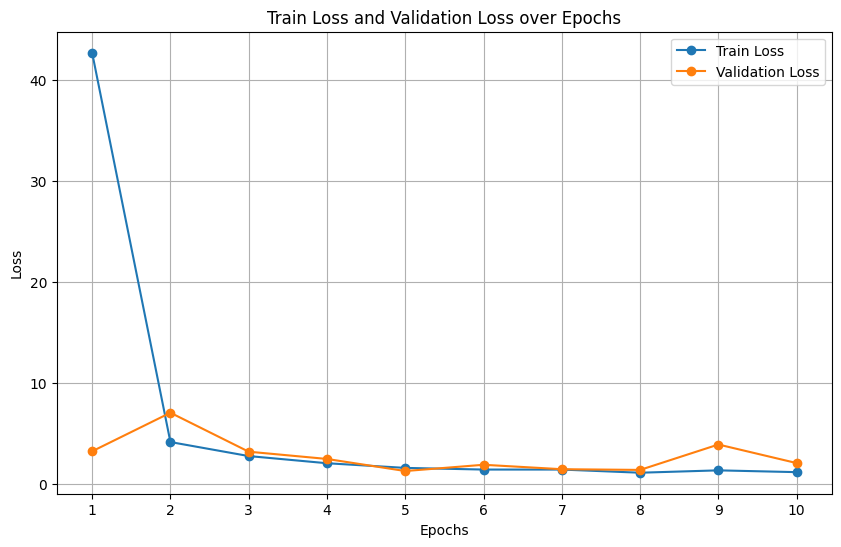

In [14]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 11))
train_loss = [42.742962085723875, 4.141625546932221, 2.7520689334869384, 2.0407947452068327, 
              1.5788128867149354, 1.4134249949455262, 1.4131299614906312, 1.100153112411499, 
              1.3348765921592713, 1.1574740645885468]
val_loss = [3.2245964854955673, 7.04875348508358, 3.1852420419454575, 2.4649068638682365, 
            1.2675845175981522, 1.8881649747490883, 1.448503240942955, 1.3786930590867996, 
            3.8969911262392998, 2.055871047079563]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')

# Labels and Title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Train Loss and Validation Loss over Epochs')
plt.legend()
plt.grid(True)
plt.xticks(epochs)  # Set x-axis to show all epoch numbers

# Show plot
plt.show()